# Zomato Data Analysis

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Dataframe

In [20]:
df = pd.read_csv("Zomato_data.csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Cleaning the Dataframe

In [4]:
#converting data type of coloumn - rate
def removeSlash(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
df['rate']=df['rate'].apply(removeSlash)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# 1.What type of restaurant do the majority of customers order from?

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of restaurant')

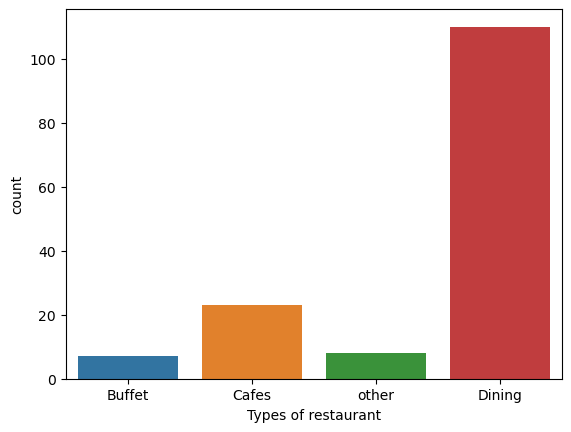

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of restaurant")

# Conclusion : Majorly people order from dining restaurant

# 2.How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

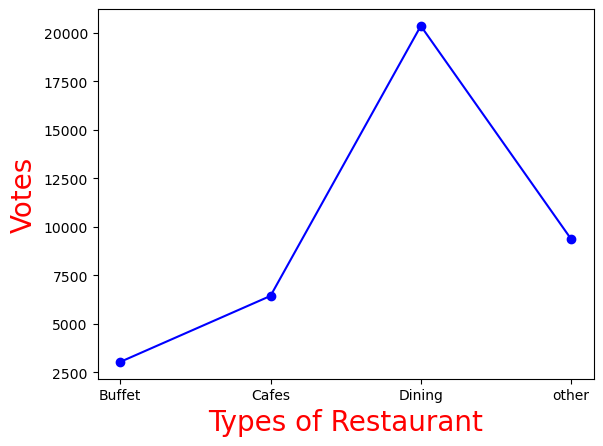

In [7]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="blue",marker="o")
plt.xlabel("Types of Restaurant", c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

# Conclusion - Dining restaurant has received maximum votes

# 3.What are the ratings that the majority of restaurants have received?

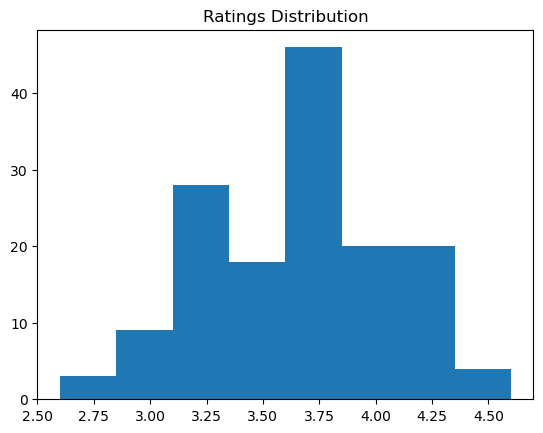

In [12]:
plt.hist(df['rate'],bins=8)
plt.title("Ratings Distribution")
plt.show()

# Conclusion - Majority of ratings recieved by restaurants are 3.75

# 4. Zomato has observed that most couples order most of their food online, What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

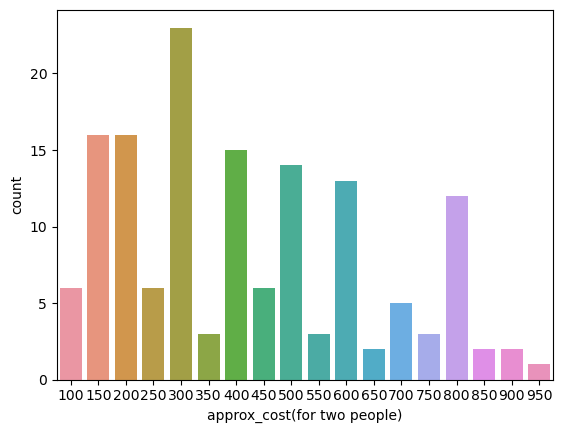

In [13]:
couple_data= df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion - Average spending cost on order is 300 

# 5.Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

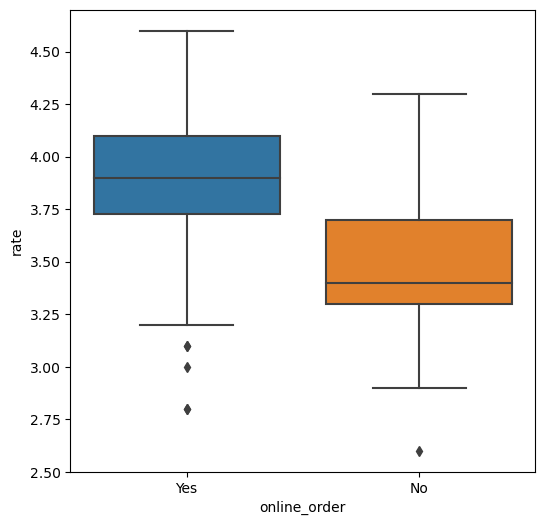

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data =df)

# Conclusion - Online mode has received maximum rating with ratings between (3.75 to 4.0), where as offline order received lower ratings

# 6.Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

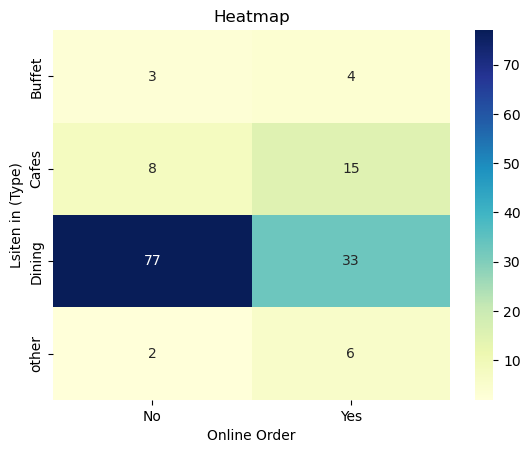

In [27]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap="YlGnBu", fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Lsiten in (Type)')
plt.show()

# Conclusion - Dining tye of Restaurants has received more offline orders 